# Price Prediction for second hand cars in Germant

## Contents

#### TODO: clean below steps

1-EDA (Exploratory Data Analysis)

1-2-Feature Engineering

2-Modeling 

  2-0-Model Selection
  
  2-1-Linear Regression
  
  2-2-Decision Tree
  
  2-3-Boosting
  
  2-4-K-Nearest Neighbourhood
  
  2-5-Random Forest
  
3-Model Comparison

4- Visualisation

5-Conclusion

In [7]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time

## 1-EDA (Exploratory Data Analysis)

The data set is cleaned in eda.ipynb and stored in final_car_data.csv. 

In [8]:
selected_df = pd.read_csv('final_car_data.csv')

In [9]:
selected_df

,year,price,power_kw,mileage_in_km,brand
0,2011,9900,103.0,119000.0,2
1,2011,9290,118.0,184574.0,2
2,2011,9499,77.0,114860.0,2
3,2011,11990,103.0,205013.0,2
4,2011,10900,150.0,192350.0,2
...,...,...,...,...,...
120791,2023,28788,81.0,5.0,0
120792,2023,28420,81.0,4900.0,0
120793,2023,59990,110.0,10500.0,0
120794,2023,30370,152.0,10.0,0


In [10]:
selected_df.describe

<bound method NDFrame.describe of         year  price  power_kw  mileage_in_km  brand
0       2011   9900     103.0       119000.0      2
1       2011   9290     118.0       184574.0      2
2       2011   9499      77.0       114860.0      2
3       2011  11990     103.0       205013.0      2
4       2011  10900     150.0       192350.0      2
...      ...    ...       ...            ...    ...
120791  2023  28788      81.0            5.0      0
120792  2023  28420      81.0         4900.0      0
120793  2023  59990     110.0        10500.0      0
120794  2023  30370     152.0           10.0      0
120795  2023  69990     110.0          501.0      0

[120796 rows x 5 columns]>

## 2-Modeling 

### 2-0-Splitting the Data Set

In [11]:
# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = selected_df.drop(columns='price').values  # Assuming 'price' is the target variable
y = selected_df['price'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.0180e+03 2.0000e+02 4.9485e+04 2.0000e+00]
 [2.0130e+03 1.2500e+02 2.0100e+05 1.0000e+00]
 [2.0180e+03 4.1000e+02 2.3000e+04 1.0000e+00]
 ...
 [2.0140e+03 8.1000e+01 2.6200e+04 0.0000e+00]
 [2.0110e+03 2.6000e+02 9.4000e+04 2.0000e+00]
 [2.0230e+03 1.1000e+02 1.0000e+01 2.0000e+00]]
[[2.0180e+03 1.1000e+02 7.7374e+04 0.0000e+00]
 [2.0160e+03 1.3500e+02 7.0000e+04 4.0000e+00]
 [2.0190e+03 7.4000e+01 2.5601e+04 5.0000e+00]
 ...
 [2.0190e+03 2.1000e+02 1.0840e+05 2.0000e+00]
 [2.0190e+03 1.1000e+02 3.1317e+04 6.0000e+00]
 [2.0150e+03 1.5000e+02 1.3500e+05 0.0000e+00]]
[ 34950  14985 126941 ...  14999  29900  46778]
[18888 19500 19290 ... 60000 28950  8499]


### 2-1-Linear Regression

In [14]:
%run regression.ipynb
out = linear_reg(X_train, y_train, X_test,y_test)
print('output= ', out)
y_pred = out[0]
#print('predicted values= ', y_pred)

output=  (array([26470.73423249, 23712.23918066, 18429.83379991, ...,
       44318.4471451 , 24147.55055158, 25914.10872634]), 6691.8046009458785, 180910073.38468328, 4208.81756968773, 0.599102469803934, 13450.28153551751, -3761964.0872479007, array([ 1.86848541e+03,  1.96336668e+02, -4.86696282e-02, -1.07220769e+03]), 56.42873482924582)


Text(0, 0.5, 'y_pred')

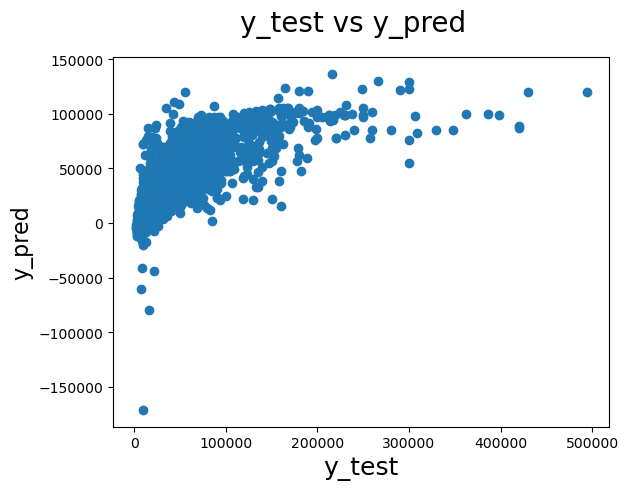

In [15]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

#### Conclusion

The dataset was highly scrapped and also is very diverse and the features given do not competely describe the listings. Therefore, the result seems satisfactory, although not highly applicable

 ###  2-2-Decision Tree

In [18]:
%run Decision_Tree.ipynb

#Measuring Execution Time
start_time = time.time()

dc_tree = decision_tree(X_train, y_train, X_test,y_test)

end_time = time.time()
execution_time = end_time - start_time

y_pred = dc_tree[0]
print("y_pred ", y_pred)
print("Accuracy: ", dc_tree[1])
print('Exection Time: ', execution_time)
print("mae, mse, medae, r2: ", dc_tree[2], dc_tree[3], dc_tree[4], dc_tree[5])

y_pred  [21945 24980 19490 ... 43800 26930 39000]
Accuracy:  0.036051324503311256
Exection Time:  46.90619611740112
mae, mse, medae, r2:  5702.12607615894 285669720.08998346 2750.0 0.3669546250619561


#### Note.
1-Decision tree took 45-60 sec (in several runs), while regression takes very short time. 

2-The accuracy is quite low; ~36% without parameters, ~11% with entropy and max_depth=3 (increasing max_depth slightly increases the accuracy). This is expected because of the diversity of the data as well as noise in the data.

#### Note. 
Plotting Decision tree either as below or as as in the Decision_Tree.ipynb causes kernel fail and restart; This should be because of the large size of the decision tree.

Text(0, 0.5, 'y_pred')

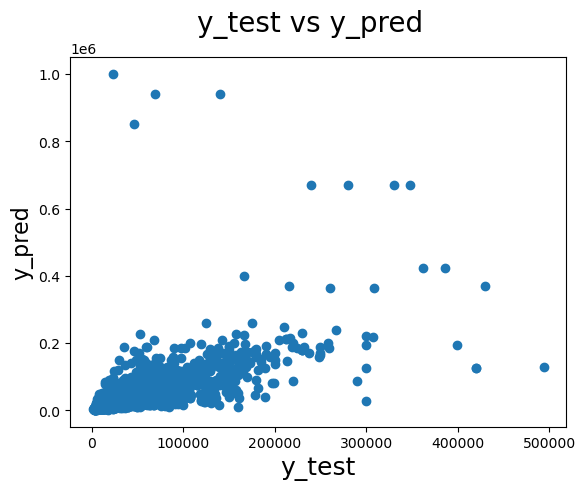

In [19]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [9]:
#features = ['year', 'power_kw', 'mileage_in_km', 'brand']
#tree_plot = tree.plot_tree(dtree, feature_names = features)

### 2-3-Boosting

#### TODO: Fix below

In [20]:
#%run boosting.ipynb
#boosting(X_train, y_train, X_test, y_test)

### 2-3-KNN

#### TODO (for E)

1-execute the function here and check the errors, etc.

2-do plotting here not in the knn.ipybn

3-write a conclusion/explanation of the errors, plots, etc.

In [6]:
%run KNN.ipynb
knn_out = knn_model(X_train, y_train, X_test, y_test)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 7))

# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_out[0], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs. Predicted Prices')
plt.show()

###  2-4-Random Forest
  

#### TODO. Do the same cleaning as in KNN

In [29]:
%run Random_Forest.ipynb

   year  price  power_kw  mileage_in_km  brand
0  2011   9900     103.0       119000.0      2
1  2011   9290     118.0       184574.0      2
2  2011   9499      77.0       114860.0      2
3  2011  11990     103.0       205013.0      2
4  2011  10900     150.0       192350.0      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120796 entries, 0 to 120795
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           120796 non-null  int64  
 1   price          120796 non-null  int64  
 2   power_kw       120796 non-null  float64
 3   mileage_in_km  120796 non-null  float64
 4   brand          120796 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.6 MB
None


KeyError: "['fuel_consumption_g_km'] not found in axis"

KeyError: "['fuel_consumption_g_km'] not found in axis"

In [ ]:
# Training the random forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
rf.fit(X_train, y_train)


# Testing the Random Forest model
# Predictions on the testing set
rf_predictions = rf.predict(X_test)

# Evaluating the Random Forest model
# Accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

## Model Comparison

## Visualization 

In [ ]:
# Visualization with Folium
import folium

# Create a map centered around a specific location
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)  # Coordinates for San Francisco

# Add a marker to the map
folium.Marker(location=[37.7749, -122.4194], popup="San Francisco").add_to(m)

# Save the map to an HTML file
m.save("map.html")

## Conclusion